# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [36]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [37]:
df.head() # Examining the dataset

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [38]:
# Importing some necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [39]:
sns.set() #setting default seaborn style

1. Is the distribution of body temperatures normal? 
Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population. 
Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test 

In [40]:
# We can check if distribution looks normal by plotting a histogram. We calculate the recommended number of bins
n_bins=int(np.sqrt(len(df))) 

In [41]:
n_bins

11

Text(0, 0.5, 'Frequency')

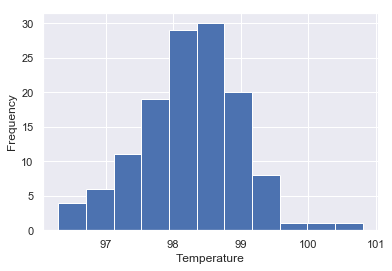

In [42]:
plt.hist(df.temperature,bins=11)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

Looks almost but not quite normal. This particular sample is skewed to the left. But we know that histogram suffers from binning bias. So we can plot the ecdf 

In [43]:
# Define ecdf function which returns two numpy arrays x and y which can be plotted to generate ecdf for a data
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [44]:
x_temp,y_temp=ecdf(df["temperature"])

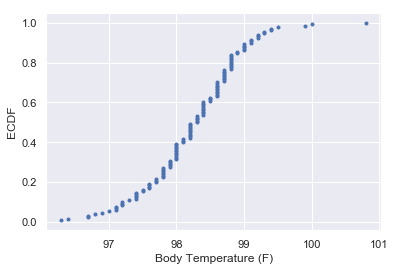

In [45]:
# Generate plot
plt.plot(x_temp,y_temp,marker='.',linestyle='none')
# Label the axes
plt.xlabel("Body Temperature (F)")
plt.ylabel("ECDF")
plt.show()

ECDF has normal appearance . Now let us check for normality using bootstraping by generating random normal samples. First calculate mean and standard deviation of the distribution. We can approximate the sample mean and sample normal distribution as the mean and standard deviation of the distribution

In [52]:
mean = np.mean(df["temperature"])
std = np.std(df["temperature"])

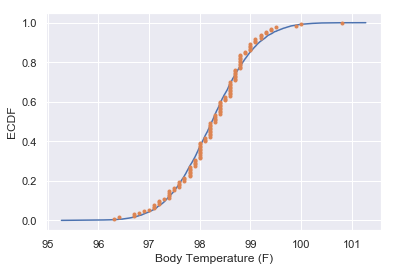

In [53]:
samples=np.random.normal(mean,std,size=10000)
x_theor,y_theor=ecdf(samples)
plt.plot(x_theor,y_theor)
plt.plot(x_temp,y_temp,marker='.',linestyle='none')
plt.xlabel("Body Temperature (F)")
plt.ylabel("ECDF")
plt.show()


By overlaying the sample ecdf with the theoretical ecdf, we can se